In [1]:
########################################################################
# Demonstration of HydroCNHS.DMCGA module
# Diverse model calibrations (DMC) genetic algorithm (GA).
# This module contains two classes:
#   (1) DMCGA
#   (2) DMCGA_Convertor
# The following section will demonstrate the usage of these two classes.
# by Chung-Yi Lin @ Lehigh University (philip928lin@gmail.com) 
# 2020/02/12
########################################################################



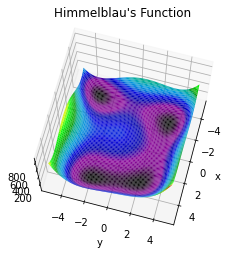

In [2]:
#---------- Part1: DMCGA ----------
# We use Himmelblau's function as our Loss Function.
# Himmelblau's function takes two arguments -5 <= x,y <= 5 and
# has 4 local optimals with their optimal values = 0.
# Description of Himmelblau's function: 
# https://en.wikipedia.org/wiki/Test_functions_for_optimization

from HydroCNHS.DMCGA import DMCGA
import matplotlib.pyplot as plt
import numpy as np

# Define Loss Function
def HimmelblauFunc(var, Formatter = None, SubWDInfo = None):
    x = var[0]
    y = var[1]
    return (x**2+y-11)**2 + (x+y**2-7)**2 #+ 10*np.random.normal()

r"""
# Four optimal solutions
HimmelblauFunc([3,2])                   = 0
HimmelblauFunc([-2.805118,3.131312])    = 0
HimmelblauFunc([-3.779310,-3.283186])   = 0
HimmelblauFunc([3.584428,-1.848126])    = 0
"""
# Plot HimmelblauFunc.  =>   -5 <= x,y <= 5
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = HimmelblauFunc([X, Y])
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='nipy_spectral', edgecolor='none')
ax.view_init(70, 15)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Himmelblau's Function");
plt.show()


In [3]:
# Setup DMCGA
Inputs = {"ParName":["x", "y"], 
          "ParBound":[[-5, 5], [-5, 5]],  # [upper, low] or [4, 6, 9] Even for category type, it has to be numbers!
          "ParType":["real","real"],      # real or category
          "ParWeight":[1, 1],  
          "WD":r"C:\Users\Philip\OneDrive\Lehigh\0_Proj2_UA-SA-Equifinality\ModelRunTest"}   
Config = {"NumSP":6,                # Number of sub-populations.
          "PopSize": 40,            # Population size. Must be even.
          "MaxGen": 100,            # Maximum generation.
          "SamplingMethod": "MC",   # Monte Carlo sampling method.
          "Tolerance":1.2,          # >= 1 
          "NumEllite": 1,           # Ellite number for each SP. At least 1.
          "MutProb": 0.3,           # Mutation probability.
          "DropRecord": True,       # Population record will be dropped. However, ALL simulated results will remain. 
          "ParalCores": 1,     # This will overwrite system config.
          "AutoSave": True,         # Automatically save a model snapshot after each generation.
          "Printlevel": 10,         # Print out level. e.g. Every ten generations.
          "Plot": True              # Plot loss with Printlevel frequency.
          }   

Himmelblau = DMCGA(LossFunc = HimmelblauFunc, Inputs = Inputs, Config = Config)


[02/12 02:50:19] HydroCNHS.DMC [WARNING] 
[!!!Important!!!] Current calibration folder exists. Default to overwrite the folder!
C:\Users\Philip\OneDrive\Lehigh\0_Proj2_UA-SA-Equifinality\ModelRunTest\Calibration


[02/12 02:50:21] HydroCNHS.DMC [INFO]    0/ 100   |----------|.


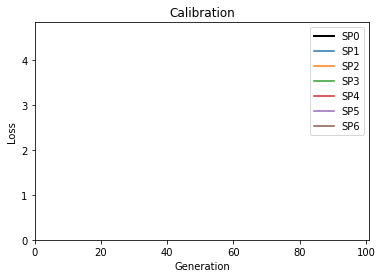

[02/12 02:50:22] HydroCNHS.DMC [INFO]   10/ 100   |#---------|.


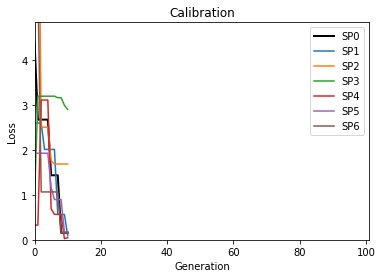

[02/12 02:50:22] HydroCNHS.DMC [INFO]   20/ 100   |##--------|.


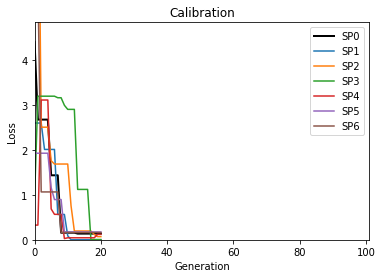

[02/12 02:50:23] HydroCNHS.DMC [INFO]   30/ 100   |###-------|.


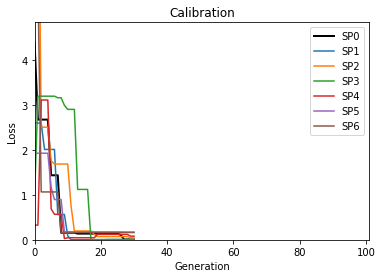

[02/12 02:50:23] HydroCNHS.DMC [INFO]   40/ 100   |####------|.


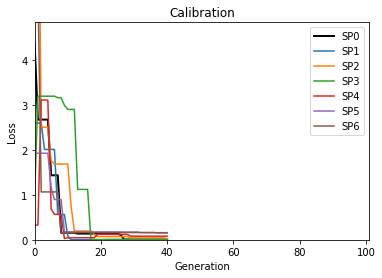

[02/12 02:50:24] HydroCNHS.DMC [INFO]   50/ 100   |#####-----|.


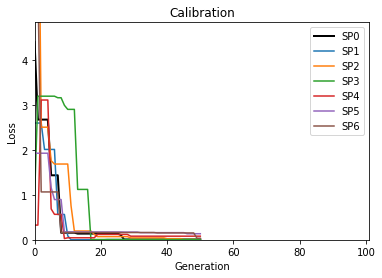

[02/12 02:50:25] HydroCNHS.DMC [INFO]   60/ 100   |######----|.


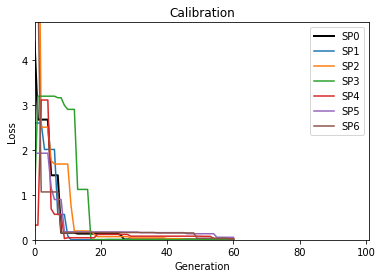

[02/12 02:50:26] HydroCNHS.DMC [INFO]   70/ 100   |#######---|.


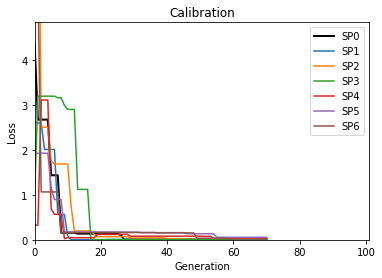

[02/12 02:50:26] HydroCNHS.DMC [INFO]   80/ 100   |########--|.


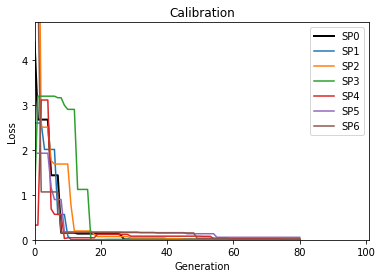

[02/12 02:50:27] HydroCNHS.DMC [INFO]   90/ 100   |#########-|.


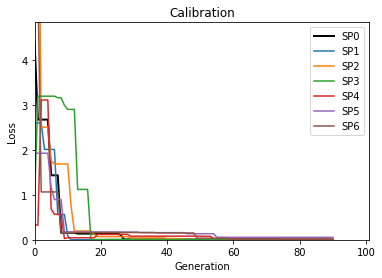

[02/12 02:50:28] HydroCNHS.DMC [INFO]  100/ 100   |##########|.


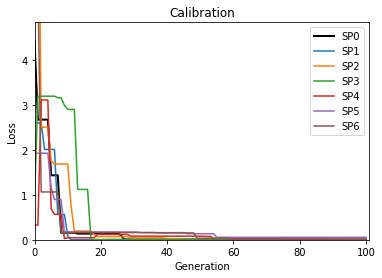

[02/12 02:50:28] HydroCNHS.DMC [INFO] Done! [00:00:07]
[02/12 02:50:28] HydroCNHS.DMC [INFO] Solutions:
SP0
  Par
    [ 3.58835088 -1.83157538]
  Loss
    0.00524370113140817
SP1
  Par
    [3.00532672 2.01338819]
  Loss
    0.0055469933774999584
SP2
  Par
    [ 3.57738286 -1.82265096]
  Loss
    0.010736580272896416
SP3
  Par
    [3.00477272 1.99602778]
  Loss
    0.0007326596040328255
SP4
  Par
    [-2.81521107  3.1455945 ]
  Loss
    0.011370903609202869
SP5
  Par
    [3.03518019 1.94679279]
  Loss
    0.05587770077418751
SP6
  Par
    [3.00164468 1.97040166]
  Loss
    0.013815635228556025


In [4]:
# Run DMCGA to solve Himmelblau's function.
Himmelblau.run()
Sols = Himmelblau.Solutions


In [5]:
# If program shutdown somehow, you can continue the previous unfinished run by loading into AutoSave.pickle.
# Himmelblau = DMCGA(LossFunc = HimmelblauFunc, Inputs = Inputs, Config = Config, ContinueFile = r"......\AutoSave.pickle" )
# Himmelblau.run()


In [6]:
#---------- Part2: DMCGA_Convertor ----------
# DMCGA_Convertor helps user to convert multiple parameter dataframe 
# (can obtain nan values) into an 1D array (parameters for calibration, 
# automatically exclude nan values) that can be used for DMCGA calibration. 
# And the Formatter created by DMCGA_Convertor can be used to convert 1D 
# array back to a list of original dataframe. Besides, we provide option 
# for defining fixed parameters, which will not enter the calibration 
# process (exclude from the 1D array).
# Note: Dataframe index has to be parameter names.

from HydroCNHS.DMCGA import DMCGA_Convertor
import pandas as pd
from pprint import pprint
# Randomly create dfs
df1 = pd.DataFrame([[1,2,3],[4,5,6]])
df2 = pd.DataFrame([[1,None,3],[4,5,6]])
df3 = pd.DataFrame([[1,2,3],[4,None,6]])
DFList = [df1,df2,df3]
for i, df in enumerate(DFList):
    df.index = ["A"+str(i+1),"B"+str(i+1)]
    df.columns = ["a","b","c"]
# Define parameter properties.    
ParTypeDict = {"A1": "real", "B1": "category",
               "A2": "real", "B2": "category",
               "A3": "real", "B3": "category"}
ParBoundDict = {"A1": [1,10], "B1": [1,2,3,4,5],
                "A2": [1,10], "B2": [4,5],
                "A3": [1,10], "B3": [1,4,5]}
ParWeightDict = {"A1":0.5, "B1":0.8,
                 "A2": 0.5, "B2": 0.8,
                 "A3": 0.5, "B3": 0.8}
FixedParList = [["A1"],[],[]]       # Don't want to calibrate "A1", usind fixed A1 values.


In [7]:
# Create Convertor object
Convertor = DMCGA_Convertor()

# Run the Convertor
# WD (path): Working directory defined in the model.yaml.
# DFList (list): A list of dataframes. Dataframe index is parameter names.
# ParTypeDict (dict): A dictionary with key = parameter name and value = paremeter type [real/category]
# ParBoundDict (dict): A dictionary with key = parameter name and value = [lower bound, upper bound] or [1, 2, 3 ...]
# ParWeightDict (dict, optional): A dictionary with key = parameter name and value = weight (from SA). Defaults to None, weight = 1.
# FixedParList (list, optional): A list contains a list of fixed parameter names (don't need calibration) for each . Defaults to None.
Convertor.genDMCGAInputs("WD", DFList, ParTypeDict, ParBoundDict, ParWeightDict, FixedParList)


In [8]:
# Take out Inputs and Formatter
Inputs = Convertor.Inputs
Formatter = Convertor.Formatter
print("Inputs dictionary:")
pprint(Inputs)
print("\nFormatter:")
pprint(Formatter)


Inputs dictionary:
{'ParBound': [[1, 2, 3, 4, 5],
              [1, 2, 3, 4, 5],
              [1, 2, 3, 4, 5],
              [1, 10],
              [1, 10],
              [4, 5],
              [4, 5],
              [4, 5],
              [1, 10],
              [1, 10],
              [1, 10],
              [1, 4, 5],
              [1, 4, 5]],
 'ParName': ['B1|a',
             'B1|b',
             'B1|c',
             'A2|a',
             'A2|c',
             'B2|a',
             'B2|b',
             'B2|c',
             'A3|a',
             'A3|b',
             'A3|c',
             'B3|a',
             'B3|c'],
 'ParType': ['category',
             'category',
             'category',
             'real',
             'real',
             'category',
             'category',
             'category',
             'real',
             'real',
             'real',
             'category',
             'category'],
 'ParWeight': [0.8, 0.8, 0.8, 0.5, 0.5, 0.8, 0.8, 0.8, 0.5, 0.5, 0.5, 0.8, 0

In [9]:
# Convert dfs to 1D array
VarArray = Convertor.to1DArray(DFList, Formatter)
print("\nDfs to 1D array, which contains no nan and fixed parameters.")
print(VarArray)



Dfs to 1D array, which contains no nan and fixed parameters.
[4. 5. 6. 1. 3. 4. 5. 6. 1. 2. 3. 4. 6.]


In [10]:
# Convert 1D array back to dfs
dflist = Convertor.toDFList(VarArray, Formatter)
print("\n1D array back to dfs.")
dflist  


1D array back to dfs.


[      a    b    c
 A1  1.0  2.0  3.0
 B1  4.0  5.0  6.0,
       a    b    c
 A2  1.0  NaN  3.0
 B2  4.0  5.0  6.0,
       a    b    c
 A3  1.0  2.0  3.0
 B3  4.0  NaN  6.0]